# CUSTOMER SEGMANTATION WITH RFM


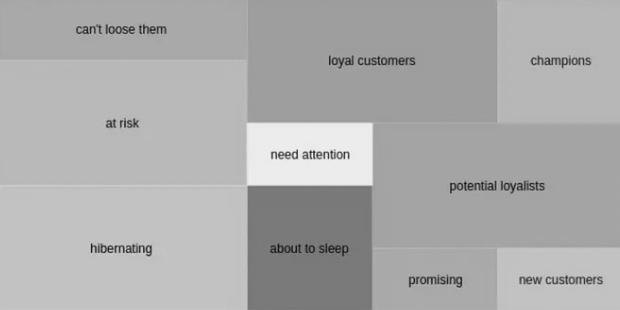

In [2]:
from IPython.display import Image
Image(filename="rfm_card.png")

## Data Understanding

In [90]:
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [10]:
df_ =pd.read_excel("Online Retail.xlsx",sheet_name="Online Retail")

In [13]:
df_.shape

(541909, 8)

In [12]:
df = df_.copy()

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [17]:
df["Description"].nunique()

4223

In [18]:
df["Description"].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [22]:
df.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,2010-12-01 09:37:00,2.55,14688.0,United Kingdom
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom


In [23]:
df["Description"].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

In [24]:
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity",ascending = False)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039
...,...
Damaged,-7540
Printing smudges/thrown away,-9058
check,-12030


In [25]:
df["InvoiceNo"].nunique()

25900

In [27]:
df["InvoiceNo"].value_counts()

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: count, Length: 25900, dtype: int64

In [28]:
df["CustomerID"].nunique()

4372

## InvoiceNo c ile başlıyorsa iptalleri gösterir

In [35]:
df[df["InvoiceNo"].str.contains(r"^C", na=False)].shape


(9288, 8)

In [36]:
df[~df["InvoiceNo"].str.contains(r"^C", na=False)].shape

(532621, 8)

In [38]:
df = df[~df["InvoiceNo"].str.contains(r"^C", na=False)]

In [39]:
df.shape

(532621, 8)

In [40]:
df[df["InvoiceNo"].str.contains(r"^C",na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [41]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [43]:
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity",ascending = False)

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
JUMBO BAG RED RETROSPOT,48478
WHITE HANGING HEART T-LIGHT HOLDER,37895
...,...
Damaged,-7540
Printing smudges/thrown away,-9058
check,-12030


In [45]:
df[df["Quantity"] > 0].shape

(531285, 8)

In [46]:
df.shape

(532621, 8)

In [47]:
df[df["Quantity"] > 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [48]:
df = df[df["Quantity"] > 0]

In [49]:
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity",ascending = False)

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
JUMBO BAG RED RETROSPOT,48478
WHITE HANGING HEART T-LIGHT HOLDER,37895
...,...
SET OF THREE VINTAGE GIFT WRAPS,1
Amazon Adjustment,1
FLOWER SHOP DESIGN MUG,1


In [50]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [51]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [52]:
df["Country"].value_counts()

Country
United Kingdom          486286
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


In [53]:
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity",ascending = False).tail()

,Quantity
Description,
SET OF THREE VINTAGE GIFT WRAPS,1
Amazon Adjustment,1
FLOWER SHOP DESIGN MUG,1
SET/4 2 TONE EGG SHAPE MIXING BOWLS,1
SET/6 IVORY BIRD T-LIGHT CANDLES,1


In [54]:
country_counts = df["Country"].value_counts().reset_index()
country_counts

,Country,count
0,United Kingdom,486286
1,Germany,9042
2,France,8408
3,EIRE,7894
4,Spain,2485
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1967
8,Portugal,1501
9,Australia,1185


In [55]:
country_counts.columns = ["Country" , "Count"]

# Seaborn Bar grafiğini çizmek

C:\Users\Emre\AppData\Local\Temp\ipykernel_13336\2249924332.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x="Count", y="Country", data=country_counts, palette="viridis")


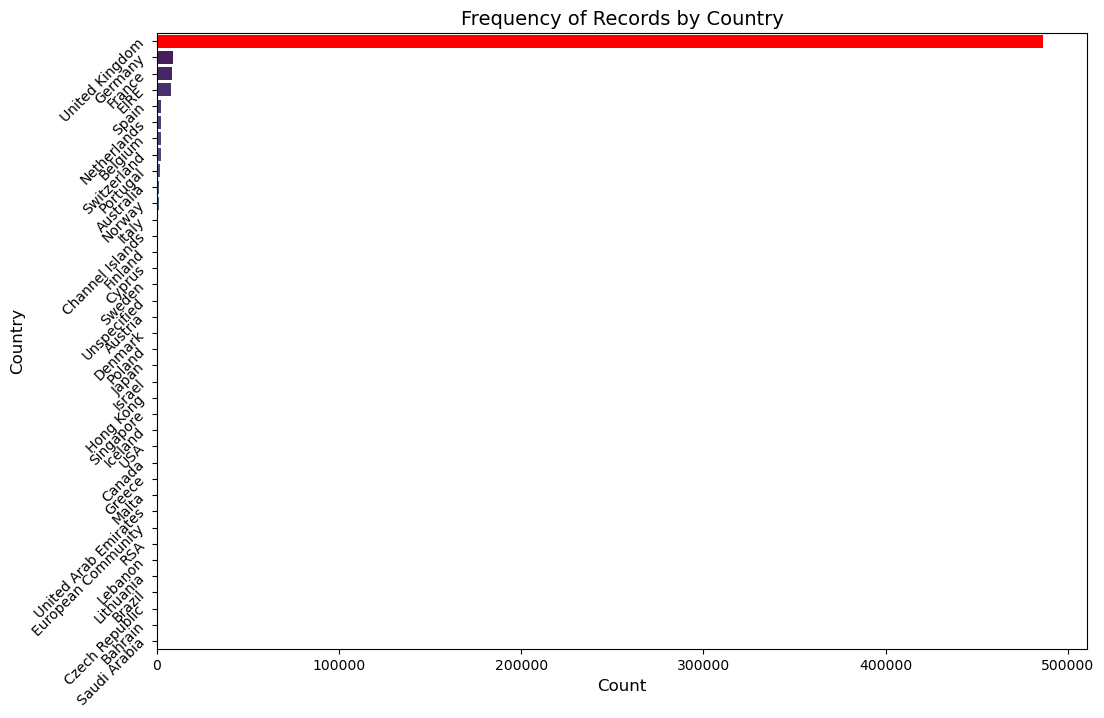

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Daha geniş bir grafik

# Barplot'u oluştur
barplot = sns.barplot(x="Count", y="Country", data=country_counts, palette="viridis")

# En yüksek değeri bul
max_index = country_counts['Count'].idxmax()
max_bar = barplot.patches[max_index]

# En yüksek çubuğun rengini değiştir
max_bar.set_facecolor('red')  # En yüksek çubuğun rengini değiştir

plt.xlabel("Count", fontsize=12)  # x eksen başlığı
plt.ylabel("Country", fontsize=12)  # y eksen başlığı
plt.title("Frequency of Records by Country", fontsize=14)
plt.yticks(rotation=45)  # Y eksenindeki etiketleri döndür
plt.show()

In [70]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
TotalPrice          0
dtype: int64

In [71]:
df.dropna(inplace=True)

In [72]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [73]:
df.shape

(397924, 9)

In [74]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [75]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [79]:
today_date= dt.datetime(2011,12,11)
print(today_date)

2011-12-11 00:00:00


In [80]:
df.groupby("CustomerID").agg({"InvoiceNo":"count"})

,InvoiceNo
CustomerID,
12346.0,1
12347.0,182
12348.0,31
12349.0,73
12350.0,17
...,...
18280.0,10
18281.0,7
18282.0,12


In [86]:
df.groupby("CustomerID").agg({"Quantity":"mean"})

,Quantity
CustomerID,
12346.0,74215.000000
12347.0,13.505495
12348.0,75.516129
12349.0,8.643836
12350.0,11.588235
...,...
18280.0,4.500000
18281.0,7.714286
18282.0,8.583333


In [88]:
df[df["CustomerID"]==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6


In [108]:
result = df.groupby("CustomerID")["InvoiceDate"].max()
result = (today_date - result).dt.days
result

CustomerID
12346.0    326
12347.0      3
12348.0     76
12349.0     19
12350.0    311
          ... 
18280.0    278
18281.0    181
18282.0      8
18283.0      4
18287.0     43
Name: InvoiceDate, Length: 4339, dtype: int64

In [121]:
df["Tenure"] = df["InvoiceDate"]
df.groupby("CustomerID").agg({"Tenure": lambda date: (today_date - date.max()).days })

,Tenure
CustomerID,
12346.0,326
12347.0,3
12348.0,76
12349.0,19
12350.0,311
...,...
18280.0,278
18281.0,181
18282.0,8


In [126]:
df.groupby("CustomerID").agg({"InvoiceNo": lambda x: len(x)}).astype(int)

,InvoiceNo
CustomerID,
12346.0,1
12347.0,182
12348.0,31
12349.0,73
12350.0,17
...,...
18280.0,10
18281.0,7
18282.0,12


In [128]:
df.groupby("CustomerID").agg({"TotalPrice": lambda x: x.sum()}).astype(int)

,TotalPrice
CustomerID,
12346.0,77183
12347.0,4310
12348.0,1797
12349.0,1757
12350.0,334
...,...
18280.0,180
18281.0,80
18282.0,178


In [134]:
df.groupby("CustomerID").agg({
    
                            "TotalPrice": lambda x: x.sum(),
                            "InvoiceNo": ['count', lambda y: len(y.unique())],  # İki farklı hesaplama
                            "Tenure": lambda date: (today_date - date.max()).days
            
                             }).astype(int)

TotalPrice InvoiceNo              Tenure
             <lambda>     count <lambda_0> <lambda>
CustomerID                                         
12346.0         77183         1          1      326
12347.0          4310       182          7        3
12348.0          1797        31          4       76
12349.0          1757        73          1       19
12350.0           334        17          1      311
...               ...       ...        ...      ...
18280.0           180        10          1      278
18281.0            80         7          1      181
18282.0           178        12          2        8
18283.0          2094       756         16        4
18287.0          1837        70          3       43

[4339 rows x 4 columns]

In [139]:
res = df.groupby("CustomerID").agg({
    "TotalPrice": lambda x: x.sum(),
    "InvoiceNo": ['count', lambda x: x.nunique()],  # İki farklı hesaplama
    "Tenure": lambda date: (today_date - date.max()).days
})

# Sonuçları yeniden şekillendirme
res.columns = ['TotalPrice', 'InvoiceCount', 'UniqueInvoiceCount', 'Tenure']  # Kolon isimlerini güncelle
res

,TotalPrice,InvoiceCount,UniqueInvoiceCount,Tenure
CustomerID,,,,
12346.0,77183.60,1,1,326
12347.0,4310.00,182,7,3
12348.0,1797.24,31,4,76
12349.0,1757.55,73,1,19
12350.0,334.40,17,1,311
...,...,...,...,...
18280.0,180.60,10,1,278
18281.0,80.82,7,1,181
18282.0,178.05,12,2,8


In [142]:
rfm = df.groupby("CustomerID").agg({
                                    "InvoiceDate": lambda date: (today_date - date.min()).days ,
                                    "Tenure": lambda date: (today_date - date.max()).days ,
                                    "InvoiceNo":  lambda x: x.nunique(),  # İki farklı hesaplama
                                    "TotalPrice": lambda x: x.sum()
})

# Sonuçları yeniden şekillendirme
rfm.columns = ['Recency', 'Tenure', 'Frequency', 'Monetary']  # Kolon isimlerini güncelle
rfm

,Recency,Tenure,Frequency,Monetary
CustomerID,,,,
12346.0,326,326,1,77183.60
12347.0,368,3,7,4310.00
12348.0,359,76,4,1797.24
12349.0,19,19,1,1757.55
12350.0,311,311,1,334.40
...,...,...,...,...
18280.0,278,278,1,180.60
18281.0,181,181,1,80.82
18282.0,127,8,2,178.05


# hatalı satın almalar varsa temizliyoruz

In [149]:
rfm[(rfm["Monetary"] > 0) & (rfm["Frequency"] > 0)].shape

(4338, 4)

In [151]:
rfm.shape

(4339, 4)

In [167]:
rfm[( rfm["Monetary"] == 0) | (rfm["Frequency"] == 0)]

,Recency,Tenure,Frequency,Monetary
CustomerID,,,,
13256.0,15,15,1,0.0


In [184]:
rfm = rfm.reset_index()
rfm[rfm["CustomerID"] == 13256.0]

,CustomerID,Recency,Tenure,Frequency,Monetary
685,13256.0,15,15,1,0.0


In [185]:
rfm.drop(index=685, inplace=True)

In [186]:
rfm.shape

(4338, 5)

In [187]:
rfm

,CustomerID,Recency,Tenure,Frequency,Monetary
0,12346.0,326,326,1,77183.60
1,12347.0,368,3,7,4310.00
2,12348.0,359,76,4,1797.24
3,12349.0,19,19,1,1757.55
4,12350.0,311,311,1,334.40
...,...,...,...,...,...
4334,18280.0,278,278,1,180.60
4335,18281.0,181,181,1,80.82
4336,18282.0,127,8,2,178.05
4337,18283.0,338,4,16,2094.88


In [194]:
rfm["Recency_Score"]= pd.qcut(rfm['Recency'],5, labels=[5,4,3,2,1])

In [195]:
rfm

,CustomerID,Recency,Tenure,Frequency,Monetary,Recency_Score
0,12346.0,326,326,1,77183.60,2
1,12347.0,368,3,7,4310.00,1
2,12348.0,359,76,4,1797.24,1
3,12349.0,19,19,1,1757.55,5
4,12350.0,311,311,1,334.40,2
...,...,...,...,...,...,...
4334,18280.0,278,278,1,180.60,3
4335,18281.0,181,181,1,80.82,4
4336,18282.0,127,8,2,178.05,4
4337,18283.0,338,4,16,2094.88,2


In [193]:
pd.crosstab(rfm['Recency'],rfm["Recency_Score"])

Recency_Score,5,4,3,2,1
Recency,,,,,
1,1,0,0,0,0
2,4,0,0,0,0
3,5,0,0,0,0
4,9,0,0,0,0
5,7,0,0,0,0
...,...,...,...,...,...
369,0,0,0,0,70
370,0,0,0,0,69
372,0,0,0,0,46


In [200]:
rfm['Monetary'].value_counts()

Monetary
76.32      4
15.00      3
35.40      3
440.00     3
363.65     3
          ..
311.65     1
5014.84    1
462.66     1
866.31     1
1837.28    1
Name: count, Length: 4276, dtype: int64

In [197]:
rfm["Frequency_Score"]= pd.qcut(rfm['Frequency'].rank(method="first"),5, labels=[5,4,3,2,1])

In [198]:
rfm

,CustomerID,Recency,Tenure,Frequency,Monetary,Recency_Score,Frequency_Score
0,12346.0,326,326,1,77183.60,2,5
1,12347.0,368,3,7,4310.00,1,1
2,12348.0,359,76,4,1797.24,1,2
3,12349.0,19,19,1,1757.55,5,5
4,12350.0,311,311,1,334.40,2,5
...,...,...,...,...,...,...,...
4334,18280.0,278,278,1,180.60,3,4
4335,18281.0,181,181,1,80.82,4,4
4336,18282.0,127,8,2,178.05,4,3
4337,18283.0,338,4,16,2094.88,2,1


In [199]:
rfm['Frequency'].value_counts()

Frequency
1      1493
2       835
3       508
4       387
5       243
6       172
7       143
8        98
9        68
10       54
11       52
12       45
13       30
15       28
14       20
17       18
18       14
19       12
20       12
21       11
16       11
25        8
26        7
28        6
22        5
23        5
30        4
37        3
27        3
24        3
31        3
32        3
34        3
33        2
55        2
47        2
39        2
38        2
29        1
41        1
51        1
124       1
63        1
45        1
91        1
46        1
210       1
48        1
201       1
74        1
93        1
44        1
57        1
50        1
62        1
35        1
97        1
86        1
60        1
Name: count, dtype: int64

In [201]:
rfm["Monetary_Score"]= pd.qcut(rfm['Monetary'],5, labels=[5,4,3,2,1])

In [202]:
rfm

,CustomerID,Recency,Tenure,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
0,12346.0,326,326,1,77183.60,2,5,1
1,12347.0,368,3,7,4310.00,1,1,1
2,12348.0,359,76,4,1797.24,1,2,2
3,12349.0,19,19,1,1757.55,5,5,2
4,12350.0,311,311,1,334.40,2,5,4
...,...,...,...,...,...,...,...,...
4334,18280.0,278,278,1,180.60,3,4,5
4335,18281.0,181,181,1,80.82,4,4,5
4336,18282.0,127,8,2,178.05,4,3,5
4337,18283.0,338,4,16,2094.88,2,1,1


In [203]:
rfm['Tenure'].value_counts()

Tenure
2      103
4       94
5       94
3       90
9       79
      ... 
293      1
251      1
340      1
272      1
356      1
Name: count, Length: 304, dtype: int64

In [204]:
rfm["Tenure_Score"]= pd.qcut(rfm['Tenure'],5, labels=[5,4,3,2,1])

In [205]:
rfm

,CustomerID,Recency,Tenure,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Tenure_Score
0,12346.0,326,326,1,77183.60,2,5,1,1
1,12347.0,368,3,7,4310.00,1,1,1,5
2,12348.0,359,76,4,1797.24,1,2,2,2
3,12349.0,19,19,1,1757.55,5,5,2,4
4,12350.0,311,311,1,334.40,2,5,4,1
...,...,...,...,...,...,...,...,...,...
4334,18280.0,278,278,1,180.60,3,4,5,1
4335,18281.0,181,181,1,80.82,4,4,5,1
4336,18282.0,127,8,2,178.05,4,3,5,5
4337,18283.0,338,4,16,2094.88,2,1,1,5


In [207]:
rfm["RFM_SCORE"]= (
                    rfm['Recency_Score'].astype(str ) +
                    rfm['Frequency_Score'].astype(str ) +
                    rfm['Monetary_Score'].astype(str )
)


In [208]:
rfm

,CustomerID,Recency,Tenure,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Tenure_Score,RFM_SCORE
0,12346.0,326,326,1,77183.60,2,5,1,1,251
1,12347.0,368,3,7,4310.00,1,1,1,5,111
2,12348.0,359,76,4,1797.24,1,2,2,2,122
3,12349.0,19,19,1,1757.55,5,5,2,4,552
4,12350.0,311,311,1,334.40,2,5,4,1,254
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,278,278,1,180.60,3,4,5,1,345
4335,18281.0,181,181,1,80.82,4,4,5,1,445
4336,18282.0,127,8,2,178.05,4,3,5,5,435
4337,18283.0,338,4,16,2094.88,2,1,1,5,211


In [210]:
rfm["RFM_SCORE"]

0       251
1       111
2       122
3       552
4       254
       ... 
4334    345
4335    445
4336    435
4337    211
4338    422
Name: RFM_SCORE, Length: 4338, dtype: object

In [217]:
## En değerli müşteri kitlesi
logic= rfm["RFM_SCORE"] == "555"
rfm[logic]

,CustomerID,Recency,Tenure,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Tenure_Score,RFM_SCORE
19,12367.0,5,5,1,168.90,5,5,5,5,555
78,12442.0,4,4,1,172.06,5,5,5,5,555
80,12445.0,23,23,1,133.40,5,5,5,4,555
148,12531.0,15,15,1,125.22,5,5,5,4,555
187,12581.0,40,40,1,197.71,5,5,5,3,555
...,...,...,...,...,...,...,...,...,...,...
2434,15657.0,23,23,1,30.00,5,5,5,4,555
2461,15692.0,29,29,1,191.04,5,5,5,4,555
2496,15740.0,50,50,1,154.88,5,5,5,3,555
2498,15744.0,78,78,1,34.80,5,5,5,2,555


In [219]:
rfm["Recency_Score"].value_counts()

Recency_Score
3    877
5    868
4    868
2    865
1    860
Name: count, dtype: int64

In [223]:
rfm["RF_SCORE"]= (
                    rfm['Recency_Score'].astype(str ) +
                    rfm['Frequency_Score'].astype(str ) 
)
rfm


,CustomerID,Recency,Tenure,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Tenure_Score,RFM_SCORE,RF_SCORE
0,12346.0,326,326,1,77183.60,2,5,1,1,251,25
1,12347.0,368,3,7,4310.00,1,1,1,5,111,11
2,12348.0,359,76,4,1797.24,1,2,2,2,122,12
3,12349.0,19,19,1,1757.55,5,5,2,4,552,55
4,12350.0,311,311,1,334.40,2,5,4,1,254,25
...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,278,278,1,180.60,3,4,5,1,345,34
4335,18281.0,181,181,1,80.82,4,4,5,1,445,44
4336,18282.0,127,8,2,178.05,4,3,5,5,435,43
4337,18283.0,338,4,16,2094.88,2,1,1,5,211,21


In [222]:
rfm["RF_SCORE"].value_counts()

RF_SCORE
11    439
55    337
54    292
32    233
21    233
22    230
44    224
43    218
33    207
45    206
23    172
12    172
42    164
35    157
34    156
53    155
31    124
25    119
13    116
24    111
14     84
52     68
41     56
15     49
51     16
Name: count, dtype: int64

In [239]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2][5]': 'cant_loose',
    r'[3][1-2]': 'about_to_sleep',
    r'[3][3]': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'[4][1]': 'promising',
    r'[5][1]': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'[5][4-5]': 'champions'
}

In [240]:
rfm["Segment"] = rfm['RF_SCORE'].replace(seg_map, regex=True)
rfm

,CustomerID,Recency,Tenure,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Tenure_Score,RFM_SCORE,RF_SCORE,Segment
0,12346.0,326,326,1,77183.60,2,5,1,1,251,25,cant_loose
1,12347.0,368,3,7,4310.00,1,1,1,5,111,11,hibernating
2,12348.0,359,76,4,1797.24,1,2,2,2,122,12,hibernating
3,12349.0,19,19,1,1757.55,5,5,2,4,552,55,champions
4,12350.0,311,311,1,334.40,2,5,4,1,254,25,cant_loose
...,...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,278,278,1,180.60,3,4,5,1,345,34,loyal_customers
4335,18281.0,181,181,1,80.82,4,4,5,1,445,44,loyal_customers
4336,18282.0,127,8,2,178.05,4,3,5,5,435,43,potential_loyalists
4337,18283.0,338,4,16,2094.88,2,1,1,5,211,21,hibernating


In [247]:
rfm.groupby("Segment")[["Recency", "Tenure", "Frequency", "Monetary"]].agg(["count", "mean", "sum"])


Recency                     Tenure                      \
                      count        mean     sum  count        mean     sum   
Segment                                                                      
about_to_sleep          357  249.773109   89169    357   45.411765   16212   
at_Risk                 483  333.318841  160993    483  183.875776   88812   
cant_loose              168  328.452381   55180    168  328.452381   55180   
champions               629   42.648649   26826    629   41.275040   25962   
hibernating            1074  344.609870  370111   1074   43.264432   46466   
loyal_customers         743  186.336474  138448    743  168.409152  125128   
need_attention          207  247.241546   51179    207  102.753623   21270   
new_customers            16   60.375000     966     16   12.375000     198   
potential_loyalists     605  114.723967   69408    605   39.117355   23666   
promising                56  155.339286    8699     56   14.250000     798   

                    Frequency                   Monetary               \
                        count       mean    sum    count         mean   
Segment                                                                 
about_to_sleep            357   5.767507   2059      357  2203.784650   
at_Risk                   483   1.983437    958      483   765.390520   
cant_loose                168   1.000000    168      168   795.351726   
champions                 629   1.054054    663      629   401.855471   
hibernating              1074  10.297952  11060     1074  5391.411806   
loyal_customers           743   1.174966    873      743   466.098373   
need_attention            207   2.338164    484      207   842.511594   
new_customers              16   6.812500    109       16  3141.525625   
potential_loyalists       605   2.846281   1722      605  1328.305324   
promising                  56   7.839286    439       56  3635.903214   

                                  
                             sum  
Segment                           
about_to_sleep        786751.120  
at_Risk               369683.621  
cant_loose            133619.090  
champions             252767.091  
hibernating          5790376.280  
loyal_customers       346311.091  
need_attention        174399.900  
new_customers          50264.410  
potential_loyalists   803624.721  
promising             203610.580